In [4]:
!pip install -q gdown

import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-08-09 10:17:33.509466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754734653.695017      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754734653.745160      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
file_id ="1mRe-Yc6aoJCY3AYGeAuspCfL-yfYbq5F"
file_name = "Magnetic-Tile-Defect.zip"
target_folder = "unziped_tile"

if not os.path.exists(file_name):
    !gdown --id {file_id} -O {file_name}
else:
    print("Zip dosyası zaten mevcut,indirilmedi")

if not os.path.exists(target_folder):
    print(f"'{target_folder}' oluşturuluyor ve zip dosyası içine açılıyor...")
    !mkdir -p "{target_folder}"
    !unzip -q -n "{file_name}" -d "{target_folder}"
    print("İşlem tamamlandı.")
else:
    print(f"'{target_folder}'zaten mevut zip açılmadı.")
##https://drive.google.com/file/d/1mRe-Yc6aoJCY3AYGeAuspCfL-yfYbq5F/view?usp=drive_link

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mRe-Yc6aoJCY3AYGeAuspCfL-yfYbq5F
To: /kaggle/working/Magnetic-Tile-Defect.zip
100%|██████████████████████████████████████| 15.2M/15.2M [00:00<00:00, 48.7MB/s]
'unziped_tile' oluşturuluyor ve zip dosyası içine açılıyor...
İşlem tamamlandı.


In [12]:
DATASET_PATH = "/kaggle/working/unziped_tile/Magnetic-Tile-Defect"

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

print("Eğitim verisi yükleniyor...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale'

print("\nDoğrulama verisi yükleniyor...")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale' 
)


class_names = train_dataset.class_names
print("\nTespit edilen sınıflar:", class_names)
NUM_CLASSES = len(class_names)



Eğitim verisi yükleniyor...
Found 863 files belonging to 5 classes.
Using 691 files for training.

Doğrulama verisi yükleniyor...
Found 863 files belonging to 5 classes.
Using 172 files for validation.

Tespit edilen sınıflar: ['MT_Blowhole', 'MT_Break', 'MT_Crack', 'MT_Fray', 'MT_Free']


In [13]:
# --- 3. MODELİ OLUŞTURMA (CNN - Evrişimli Sinir Ağı) ---

model = models.Sequential([
   
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    
    
    layers.Rescaling(1./255),
    
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
   
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax') # Çıkış katmanı: Sınıf sayısı kadar nöron ve olasılık için softmax
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,709 (12.61 MB)

 Trainable params: 3,304,709 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# --- 4. MODELİ DERLEME ---
.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)



Model eğitimi başlıyor...
Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9905 - loss: 0.0428 - val_accuracy: 0.8953 - val_loss: 0.3527
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9862 - loss: 0.0438 - val_accuracy: 0.9012 - val_loss: 0.5161
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.8953 - val_loss: 0.4942
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9980 - loss: 0.0088 - val_accuracy: 0.9128 - val_loss: 0.4628
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9128 - val_loss: 0.6439
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9918 - loss: 0.0150 - val_accuracy: 0.9128 - val_loss: 0.5278
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9914 - loss: 0.0219 - val_accuracy: 0.8895 - val_loss: 0.7166
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9968 - loss: 0.0086

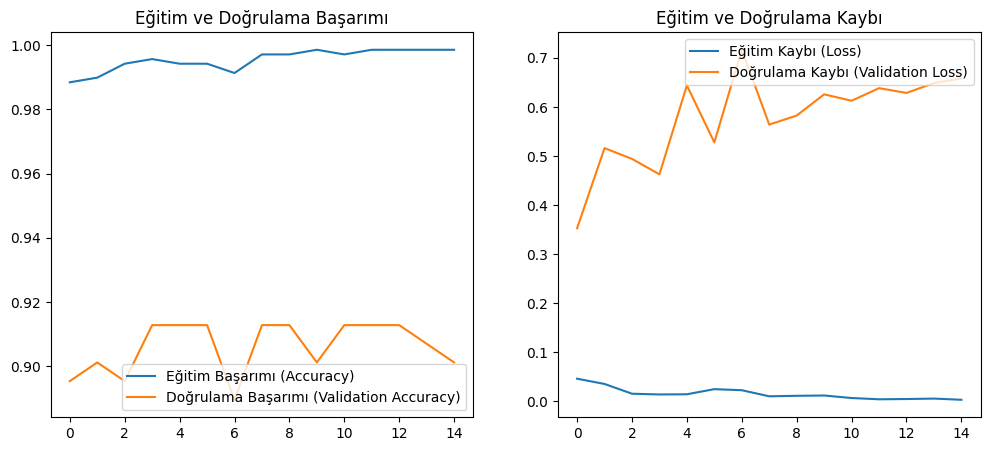

In [18]:
# --- 5. MODELİ EĞİTME ---
print("\nModel eğitimi başlıyor...")

epochs = 15 
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)
print("Model eğitimi tamamlandı!")


# --- 6. EĞİTİM SONUÇLARINI GÖRSELLEŞTİRME ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı (Accuracy)')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı (Validation Accuracy)')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()
